# Estudo de dados da COVID-19 no Brasil

### Análise Exploratória 

Autor:Geraldo Aparecido da Silva

fonte dos dados:https://github.com/wcota/covid19br


In [7]:
import pandas as pd
#Fonte do dataset --> https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities-time.csv
dataset = "https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-cities-time.csv"

#criando objeto para manipular dataset

df = pd.read_csv(dataset, header=None,skiprows=1)

# colocar head no dataset
cabecalho = ["date","country","state","city","ibgeID","novasMortes","mortes","novosCasos","totalCasos","deaths_per_100k_inhabitants","totalCases_per_100k_inhabitants","deaths_by_totalCases","source"]
print(cabecalho)

df.columns = cabecalho

['date', 'country', 'state', 'city', 'ibgeID', 'novasMortes', 'mortes', 'novosCasos', 'totalCasos', 'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants', 'deaths_by_totalCases', 'source']


In [8]:
df.head(1)

,date,country,state,city,ibgeID,novasMortes,mortes,novosCasos,totalCasos,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,source
0,2020-02-25,Brazil,SP,São Paulo/SP,3550308,0,0,1,1,0.0,0.00816,0.0,SES


In [9]:
df.tail(1)

,date,country,state,city,ibgeID,novasMortes,mortes,novosCasos,totalCasos,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,source
110706,2020-05-23,Brazil,TOTAL,TOTAL,0,1056,22205,17544,351492,10.56641,167.25996,0.06317,NaN


In [10]:
#criando novo datadrame
casos_mortes = df[['novasMortes','mortes' ,'novosCasos', 'totalCasos']]

#dados estatísticos do dados
casos_mortes.describe()

,novasMortes,mortes,novosCasos,totalCasos
count,110707.000000,110707.000000,110707.000000,110707.000000
mean,0.401239,6.672171,6.353618,101.350032
std,11.792591,212.234486,191.837155,3175.186850
min,-128.000000,0.000000,-1192.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,3.000000
75%,0.000000,1.000000,1.000000,12.000000
max,1115.000000,22205.000000,21189.000000,351492.000000


<h4>Correlação estatística </h4>

Coefficient of Correlation: Statistical correlation is measured by what is called the coefficient of correlation (r). Its numerical value ranges from +1.0 to -1.0.It gives us an indication of both the strength and direction of the relationship between variables. [https://explorable.com/statistical-correlation](https://explorable.com/statistical-correlation)

In [11]:
#calculando correlação
casos_mortes.corr()

,novasMortes,mortes,novosCasos,totalCasos
novasMortes,1.000000,0.963534,0.970580,0.959259
mortes,0.963534,1.000000,0.966647,0.996902
novosCasos,0.970580,0.966647,1.000000,0.971939
totalCasos,0.959259,0.996902,0.971939,1.000000


In [12]:
from scipy import stats
import numpy as np

pearson_coef, p_value = stats.pearsonr(casos_mortes['totalCasos'], df['mortes'])
print("Pearson ", pearson_coef, " P-value  =", p_value)

Pearson  0.9969024125883783  P-value  = 0.0


In [13]:
pearson_coef, p_value = stats.pearsonr(casos_mortes['novosCasos'], df['mortes'])
print("Pearson ", pearson_coef, " P-value  =", p_value)

Pearson  0.9666472409924077  P-value  = 0.0


In [14]:
pearson_coef, p_value = stats.pearsonr(casos_mortes['novosCasos'], df['novasMortes'])
print("Pearson ", pearson_coef, " P-value  =", p_value)  

Pearson  0.970579562885256  P-value  = 0.0


<H4> Gerando gráficos </H4>

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

/home/geraldo/.pyenv/versions/anaconda3-2018.12/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


,totalCasos,mortes
totalCasos,1.000000,0.996902
mortes,0.996902,1.000000


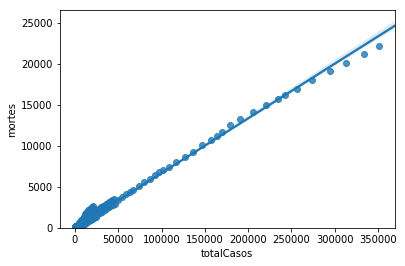

In [16]:
sns.regplot(x="totalCasos",y="mortes", data=casos_mortes)
plt.ylim(0,)

#correlação
casos_mortes[['totalCasos', 'mortes']].corr()

,novosCasos,mortes
novosCasos,1.000000,0.966647
mortes,0.966647,1.000000


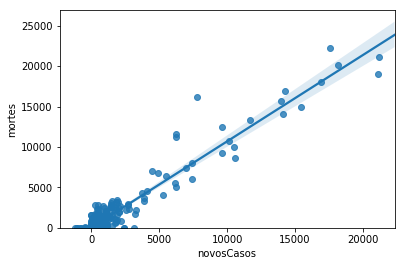

In [17]:
sns.regplot(x="novosCasos",y="mortes", data=casos_mortes)
plt.ylim(0,)

#correlação
casos_mortes[['novosCasos', 'mortes']].corr()

,novosCasos,novasMortes
novosCasos,1.00000,0.97058
novasMortes,0.97058,1.00000


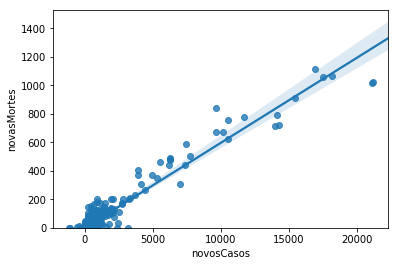

In [18]:
sns.regplot(x="novosCasos",y="novasMortes", data=casos_mortes)
plt.ylim(0,)

#correlação
casos_mortes[['novosCasos', 'novasMortes']].corr()

<h3>1. Regressão Linear Simples</h3>

In [19]:
# para calcular modelos de previsão usamos :

from sklearn.linear_model import LinearRegression

In [20]:
#instaciando objeto 

reg_lin_sim = LinearRegression()

In [21]:
# modelo de regressão linear de mortes por covid-19 em relação  total de casos

X = df[['totalCasos']]
Y = df['mortes']

reg_lin_sim.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
#Yhat=reg_lin_sim.predict(X)
#Yhat[5000:6000]  
178045*0.0687 - 0.21

12231.4815

In [23]:
reg_lin_sim.intercept_ 


-0.08124065892242616

In [24]:
reg_lin_sim.coef_

array([0.06663453])